In [1]:
# !pip install wandb
import wandb

In [2]:
# !export WANDB_API_KEY={YOUR_API_KEY}

In [3]:
import pandas as pd 
import wandb

api = wandb.Api()
entity, project = "pid-nn", "pointmass-easy-statePredictiveVAE-run-center"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

# runs_df.to_csv("project.csv")

/Users/haradakeno/.pyenv/versions/3.8.7/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
runs_df.head()

,summary,config,name
0,"{'_step': 1, '_wandb': {'runtime': 9}, '_runti...","{'lr': 0.001, 'beta': 1, 'seed': 1, 'x_dim': 4...",beta_1.0_aif_1.0_27z0r9cn
1,"{'_step': 1, '_wandb': {'runtime': 9}, '_runti...","{'lr': 0.001, 'beta': 1, 'seed': 1, 'x_dim': 4...",beta_1.0_aif_0.001_1dz7bm77
2,"{'_step': 1, '_wandb': {'runtime': 9}, '_runti...","{'lr': 0.001, 'beta': 1, 'seed': 1, 'x_dim': 4...",beta_1.0_aif_0.1_2nk3n440
3,"{'_step': 1, '_wandb': {'runtime': 9}, '_runti...","{'lr': 0.001, 'beta': 1, 'seed': 1, 'x_dim': 4...",beta_1.0_aif_0.01_1s0vcsd6
4,{'state_best_image': {'sha256': 'b3830cf432d3b...,"{'lr': 0.001, 'beta': 1, 'seed': 1, 'x_dim': 4...",beta_1.0_aiftarget_1.0_2daa4f7j


In [5]:
run_ids = runs_df['name'].tolist()
print(run_ids)

['beta_1.0_aif_1.0_27z0r9cn', 'beta_1.0_aif_0.001_1dz7bm77', 'beta_1.0_aif_0.1_2nk3n440', 'beta_1.0_aif_0.01_1s0vcsd6', 'beta_1.0_aiftarget_1.0_2daa4f7j', 'beta_1.0_aiftarget_0.001_522xp07b', 'beta_1.0_aiftarget_0.1_17wz4u1v', 'beta_1.0_aiftarget_0.01_yaeu8xzd', 'beta_1.0_pidobs_1.0_u6c18y2i', 'beta_1.0_pidobs_0.001_ov65b54s', 'beta_1.0_pidobs_0.1_1epzusat', 'beta_1.0_pidobs_0.01_bjauytms', 'beta_1.0_pid_1.0_2j4z2xtw', 'beta_1.0_pid_0.001_2ze783dw', 'beta_1.0_pid_0.1_1bjz56zu', 'beta_1.0_pid_0.01_3unwe86j', 'beta_0.1_aif_1.0_1i4s6sph', 'beta_0.1_aif_0.001_g5s4d729', 'beta_0.1_aif_0.1_29ypimf4', 'beta_0.1_aif_0.01_30pf86kr', 'beta_0.1_aiftarget_1.0_15in0bw1', 'beta_0.1_aiftarget_0.001_bf3b86xo', 'beta_0.1_aiftarget_0.1_34aux55e', 'beta_0.1_aiftarget_0.01_2f0u3vvq', 'beta_0.1_pidobs_1.0_1pqzg07b', 'beta_0.1_pidobs_0.001_2kc1y8o8', 'beta_0.1_pidobs_0.1_3a98udg9', 'beta_0.1_pidobs_0.01_23bf186y', 'beta_0.1_pid_1.0_id02z8lp', 'beta_0.1_pid_0.001_xzkic5yj', 'beta_0.1_pid_0.1_3cyfm8ek', 'beta

In [6]:
import wandb
api = wandb.Api()

# run is specified by <entity>/<project>/<run_id>
for run_id in run_ids:
    if run_id.split('_')[2] == 'aif':
        continue
    run_id = run_id.split('_')[-1]
    # logのデータを持ってくる
    run = api.run(f'{entity}/{project}/{run_id}')
    # save the metrics for the run to a csv file
    metrics_dataframe = run.history()
    break


metrics_dataframe

,_step,target_image,_runtime,_timestamp,state_loss_total,FE,FE_best_image,obs_images,state_best_image
0,0,"{'height': 256, 'path': 'media/images/target_i...",8,1646014055,NaN,NaN,NaN,NaN,NaN
1,1,NaN,8,1646014055,0.500000,NaN,NaN,NaN,NaN
2,2,NaN,9,1646014056,0.500001,0.000753,NaN,NaN,NaN
3,3,NaN,9,1646014056,0.500003,0.000753,NaN,NaN,NaN
4,4,NaN,9,1646014056,0.500006,0.000753,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
98,98,NaN,10,1646014057,0.505071,0.000753,NaN,NaN,NaN
99,99,NaN,10,1646014057,0.505176,0.000753,NaN,NaN,NaN
100,100,NaN,10,1646014057,0.505282,0.000753,NaN,NaN,NaN
101,101,NaN,10,1646014057,0.505389,0.000753,NaN,NaN,NaN


## 参考記事
matplotlibの作図上のいろんな設定について  
https://qiita.com/nkay/items/d1eb91e33b9d6469ef51#6-%E8%BB%B8%E3%81%AE%E8%A8%AD%E5%AE%9A

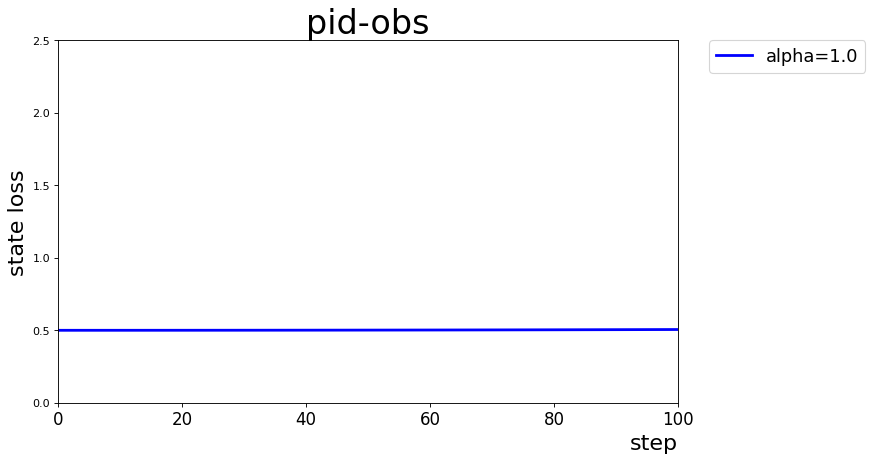

In [7]:
# http://www.turbare.net/transl/scipy-lecture-notes/intro/matplotlib/matplotlib.html
# https://pystyle.info/matplotlib-set-xy-label-and-title/
from matplotlib import pyplot as plt
import numpy as np
# 0の目盛りは左下に合わせましょう．
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0
X = np.linspace(0, 100, 101, endpoint=True)
Y = metrics_dataframe['state_loss_total'][1:102]
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, Y, color="blue", linewidth=2.5, linestyle="-", label="alpha=1.0")
# 判例に関する設定, 図の外にlegendを持って行きたい時はbbox_to_anchorを指定する
# https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462
plt.legend(fontsize=16, loc='upper left',  bbox_to_anchor=(1.05, 1), borderaxespad=0)
# x軸の目盛
plt.xticks([0, 20, 40, 60, 80, 100], fontsize=15)

plt.xlabel('step', fontsize=20, loc='right')
# rotationについて: https://upura.hatenablog.com/entry/2017/07/05/170005
plt.ylabel('state loss', fontsize=20, loc='center', rotation=90)
plt.title('pid-obs', fontsize=30)
# 軸の最大, 最小を設定
plt.xlim(0, 100)
plt.ylim(0, 2.5)
# legendsが画像保存した時に見切れないようにする
# https://gist.github.com/spider-man-tm/011bf690404d83e20378010a002eb7f4
plt.savefig('filename.png', bbox_inches='tight')
plt.show()

In [8]:
import sys
def check_max_min(entity='pid-nn', project='pointmass-easy-statePredictiveVAE-run-center'):
    runs = api.runs(entity + "/" + project) 

    summary_list, config_list, name_list = [], [], []
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
             if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

    runs_df = pd.DataFrame({
        "summary": summary_list,
        "config": config_list,
        "name": name_list
        })
    run_ids = runs_df['name'].tolist()
    max_value = -sys.maxsize-1
    min_value = sys.maxsize
    
    for run_id in run_ids:
        if run_id.split('_')[1] == '1.0':
            # beta = 0.1のみ
            continue
        if run_id.split('_')[2] == 'aif':
            # aifのデータは除外
            continue
        run_id = run_id.split('_')[-1]
        run = api.run(f'{entity}/{project}/{run_id}')
        df = run.history()
        if max_value < df['state_loss_total'].max():
            max_value = df['state_loss_total'].max()
        if df['state_loss_total'].min() < min_value:
            min_value = df['state_loss_total'].min()
    print('max: ', max_value)
    print('min: ', min_value)

In [9]:
check_max_min()

max:  2.3059739832522412
min:  1.4838737944137004e-09


In [10]:
def make_plot(method_name='pid', x_lim=(0, 100), y_lim=(0, 2.5), title='latent action', img_file_name='PredictiveVAE_'):
    img_file_name = img_file_name + method_name + '.png'
    alpha_1 = []
    alpha_0_1 = []
    alpha_0_01 = []
    alpha_0_001 = []
    for run_id in run_ids:
        if run_id.split('_')[1] == '1.0':
            # beta = 0.1のみ
            continue
        if run_id.split('_')[2] == method_name and run_id.split('_')[3] == '1.0':
            run_id = run_id.split('_')[-1]
            run = api.run(f'{entity}/{project}/{run_id}')
            alpha_1 = run.history()
        elif run_id.split('_')[2] == method_name and run_id.split('_')[3] == '0.1':
            run_id = run_id.split('_')[-1]
            run = api.run(f'{entity}/{project}/{run_id}')
            alpha_0_1 = run.history()
        elif run_id.split('_')[2] == method_name and run_id.split('_')[3] == '0.01':
            run_id = run_id.split('_')[-1]
            run = api.run(f'{entity}/{project}/{run_id}')
            alpha_0_01 = run.history()
        elif run_id.split('_')[2] == method_name and run_id.split('_')[3] == '0.001':
            run_id = run_id.split('_')[-1]
            run = api.run(f'{entity}/{project}/{run_id}')
            alpha_0_001 = run.history()
        else:
            continue
    plt.rcParams['axes.xmargin'] = 0.0 
    plt.rcParams['axes.ymargin'] = 0.0
    X = np.linspace(0, 100, 101, endpoint=True)
    alpha_1 = alpha_1['state_loss_total'][1:102]
    alpha_0_1 = alpha_0_1['state_loss_total'][1:102]
    alpha_0_01 = alpha_0_01['state_loss_total'][1:102]
    alpha_0_001 = alpha_0_001['state_loss_total'][1:102]
    plt.figure(figsize=(10, 6), dpi=80)
    plt.plot(X, alpha_1, color="blue", linewidth=2.5, linestyle="-", label="alpha=1.0")
    plt.plot(X, alpha_0_1, color="green", linewidth=2.5, linestyle="-", label="alpha=0.1")
    plt.plot(X, alpha_0_01, color="red", linewidth=2.5, linestyle="-", label="alpha=0.01")
    plt.plot(X, alpha_0_001, color="violet", linewidth=2.5, linestyle="-", label="alpha=0.001")
    # 判例に関する設定
    plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
    # x軸の目盛
    plt.xticks([0, 20, 40, 60, 80, 100], fontsize=15)
    plt.yticks(fontsize=15)

    plt.xlabel('step', fontsize=20, loc='right')
    plt.ylabel('state loss', fontsize=20, loc='center', rotation=90)
    plt.title(title, fontsize=30)
    
    # 軸の最大, 最小を設定
    plt.xlim(*x_lim)
    plt.ylim(*y_lim)
    plt.savefig(img_file_name, bbox_inches='tight')
    plt.show()

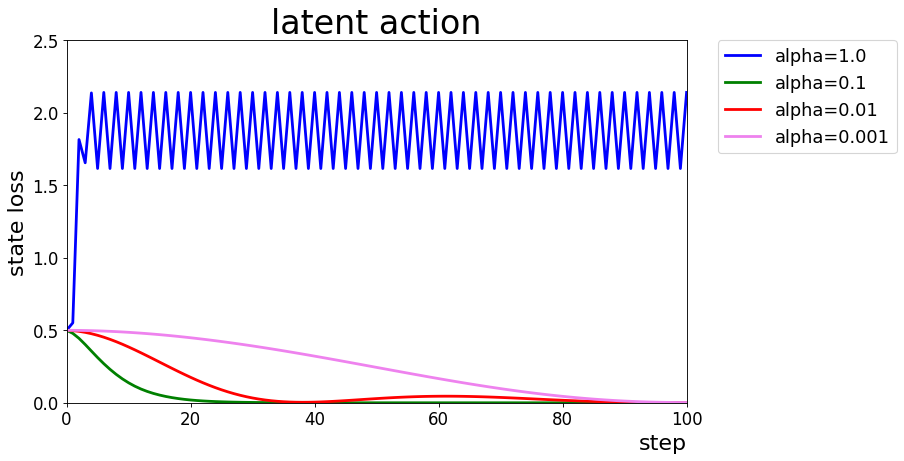

In [11]:
make_plot()

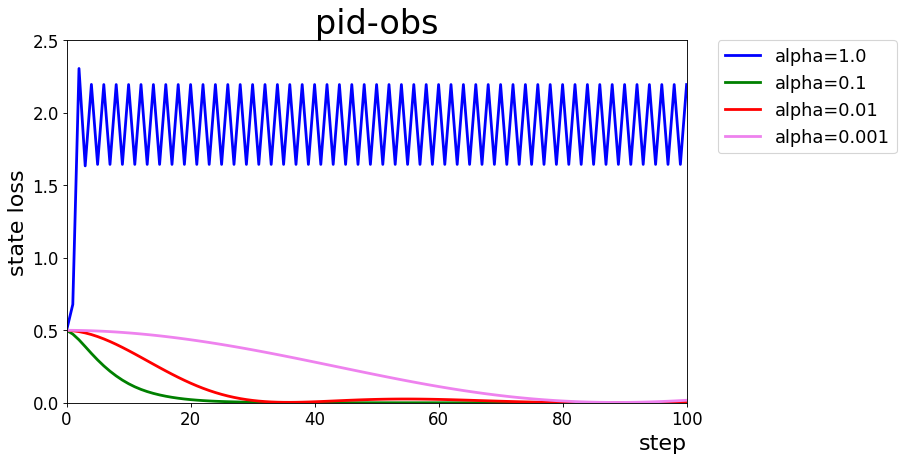

In [12]:
make_plot(method_name='pidobs', title='pid-obs')

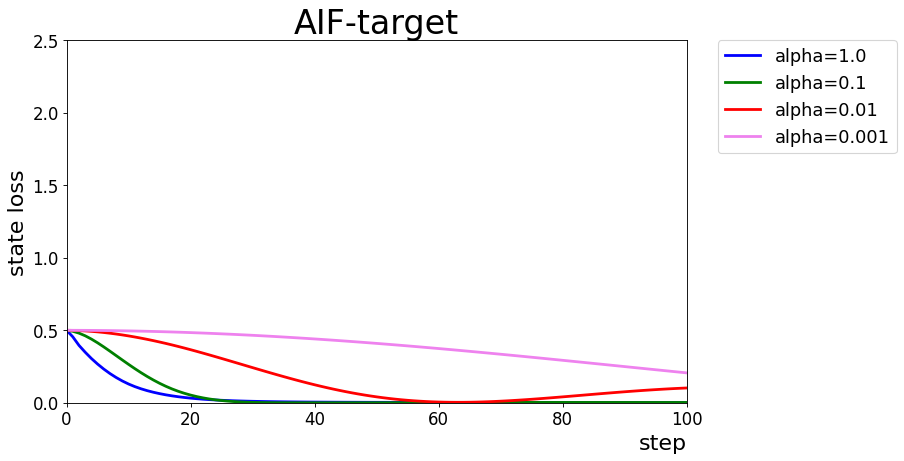

In [13]:
make_plot(method_name='aiftarget', title='AIF-target')